## Real Estate Price Pridictor

In [1]:
 import pandas as pd 

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [5]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
%matplotlib inline

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

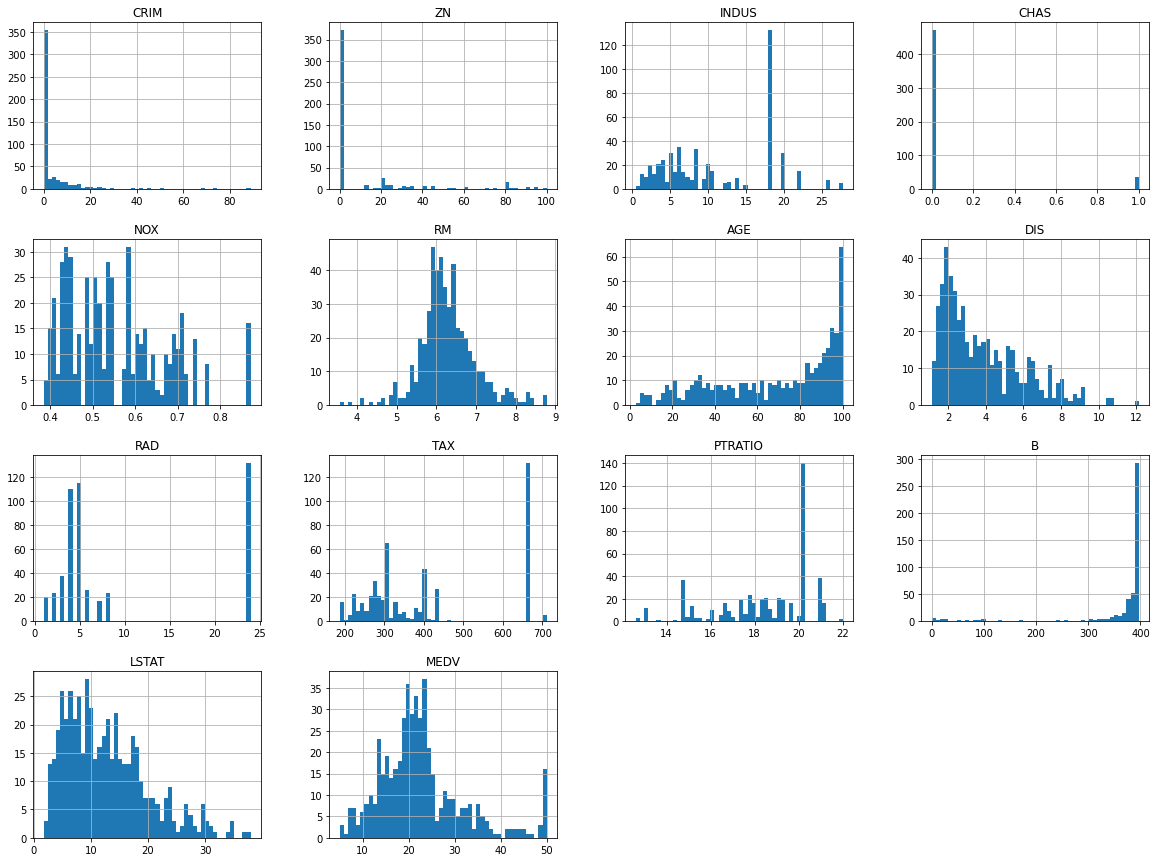

In [7]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize = (20,15))

## Train , Test , Spliting 

In [8]:
import numpy as np

# manualy doing train-test spliting

def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [9]:
#train_set, test_set = split_train_test(housing, 0.2)    

In [10]:
#print(f"Rows in Train set : {len(train_set)}\nRows in Test set : {test_set}")

In [11]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(housing,test_size = 0.2,random_state = 42)
print(f"Rows in Train set : {len(train_set)}\nRows in Test set : {test_set}")

Rows in Train set : 404
Rows in Test set :          CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
173   0.09178   0.0   4.05     0  0.510  6.416   84.1  2.6463    5  296   
274   0.05644  40.0   6.41     1  0.447  6.758   32.9  4.0776    4  254   
491   0.10574   0.0  27.74     0  0.609  5.983   98.8  1.8681    4  711   
72    0.09164   0.0  10.81     0  0.413  6.065    7.8  5.2873    4  305   
452   5.09017   0.0  18.10     0  0.713  6.297   91.8  2.3682   24  666   
..        ...   ...    ...   ...    ...    ...    ...     ...  ...  ...   
412  18.81100   0.0  18.10     0  0.597  4.628  100.0  1.5539   24  666   
436  14.42080   0.0  18.10     0  0.740  6.461   93.3  2.0026   24  666   
411  14.05070   0.0  18.10     0  0.597  6.657  100.0  1.5275   24  666   
86    0.05188   0.0   4.49     0  0.449  6.015   45.1  4.4272    3  247   
75    0.09512   0.0  12.83     0  0.437  6.286   45.0  4.5026    5  398   

     PTRATIO       B  LSTAT  MEDV  
173     16.6  395.50

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1,test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing ,housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [13]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [14]:
#95/7

In [15]:
#376/28

In [16]:
housing = strat_test_set.copy()

## Looking for Correlations

In [17]:
corr_matrix = housing.corr()

In [18]:
corr_matrix['MEDV'].sort_values(ascending = False) #correlation

MEDV       1.000000
RM         0.769364
ZN         0.449562
DIS        0.292944
B          0.168425
CHAS       0.043900
CRIM      -0.388768
RAD       -0.414798
AGE       -0.434078
NOX       -0.450991
TAX       -0.525037
INDUS     -0.534485
PTRATIO   -0.573036
LSTAT     -0.726741
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

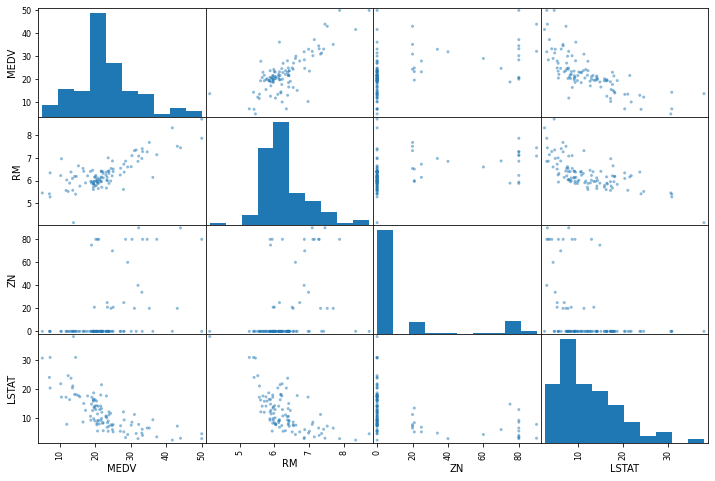

In [19]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV",'RM',"ZN","LSTAT"] 
scatter_matrix(housing[attributes],figsize = (12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

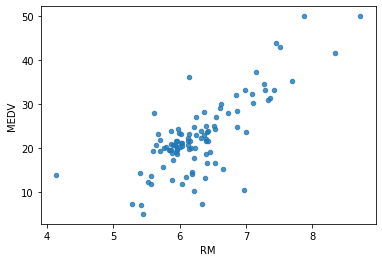

In [20]:
housing.plot(kind = "scatter", x="RM" , y = "MEDV",alpha = 0.8 )

## Trying out Attribute combinations

In [21]:
housing["TAXRM"] = housing['TAX'] / housing['RM']

In [22]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
342,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65,16.5,64.525994
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2,107.022336
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60,30.1,46.388637
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0,43.307704
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4,43.156140


In [23]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False) #correlation

MEDV       1.000000
RM         0.769364
ZN         0.449562
DIS        0.292944
B          0.168425
CHAS       0.043900
CRIM      -0.388768
RAD       -0.414798
AGE       -0.434078
NOX       -0.450991
TAX       -0.525037
INDUS     -0.534485
PTRATIO   -0.573036
TAXRM     -0.597631
LSTAT     -0.726741
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

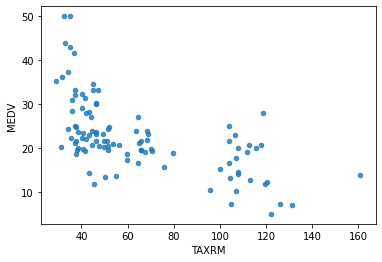

In [24]:
housing.plot(kind = "scatter", x="TAXRM" , y = "MEDV",alpha = 0.8 )

In [25]:
housing = strat_train_set.drop("MEDV" , axis = 1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing Attributes

In [26]:
#To take care of missing attributes , you have three options :
    #1 . Get rid of the missing data points 
    #2 . Get rid of the whole attributes
    #3 . Set the value to some value (0 ,mean or median)

## Option 1

#a = housing.dropna(subset = ["RM"]) #option 1
#a.shape

## Option 2

In [27]:
#housing.drop("RM",axis = 1).shape #option 2

## Option 3

In [28]:
#median = housing["RM"].median()
#housing["RM"].fillna(median)

In [29]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [30]:
X = imputer.transform(housing)

In [31]:
housing_tr = pd.DataFrame(X,columns = housing.columns)

In [32]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Feature Scaling

Primarily , two types of feature scaling methods :
1. Min-Max scaling (Normalization)
   value - min / ( max - min )
   sklearn provides a class called MinMaxScaler for this 
    
2. Standardilization
   ( value - mean ) / std
   Sklearn provides a class called Standard Scaler for this

## Creating Pipeline

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer' , SimpleImputer (strategy = "median")),
    # ..... add as manay as you want in your pipeline
    ('std_scaler' , StandardScaler()),
])

In [34]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [35]:
housing_num_tr.shape

(404, 13)

## Selecting a desired model for Real Estates

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr , housing_labels)

RandomForestRegressor()

In [37]:
some_data = housing.iloc[:5]

In [38]:
some_labels = housing_labels.iloc[:5]

In [39]:
prepared_data = my_pipeline.transform(some_data)

In [40]:
model.predict(prepared_data)

array([22.259, 25.351, 16.745, 23.466, 23.795])

In [41]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [42]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels , housing_predictions)
rmse = np.sqrt(mse)

In [43]:
rmse

1.204525170404758

## Using better Evaluation technique - Cross Validation 

In [44]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model , housing_num_tr , housing_labels , scoring = "neg_mean_squared_error" , cv = 10)
rmse_scores = np.sqrt(-scores)

In [45]:
rmse_scores

array([2.91083438, 2.69375894, 4.42553581, 2.64540835, 3.3551673 ,
       2.62207671, 4.52758351, 3.35259602, 3.03493048, 3.15775705])

In [46]:
def print_scores(scores):
    print("Scores : " , scores)
    print("Mean : ", scores.mean())
    print("Standard deviation : " , scores.std())

In [47]:
print_scores(rmse_scores)

Scores :  [2.91083438 2.69375894 4.42553581 2.64540835 3.3551673  2.62207671
 4.52758351 3.35259602 3.03493048 3.15775705]
Mean :  3.272564854161567
Standard deviation :  0.653423158424169


## convert this notebook into a python file and run the pipeline using visual studio code 

## write text file automatically

## Saving the model

In [48]:
from joblib import dump , load 
dump(model , 'RealEstates.joblib')

['RealEstates.joblib']

## Testing the model on test Data

In [49]:
X

array([[4.81900e-02, 8.00000e+01, 3.64000e+00, ..., 1.64000e+01,
        3.92890e+02, 6.57000e+00],
       [1.50100e-02, 8.00000e+01, 2.01000e+00, ..., 1.70000e+01,
        3.90940e+02, 5.99000e+00],
       [4.87141e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.96210e+02, 1.86800e+01],
       ...,
       [8.18700e-02, 0.00000e+00, 2.89000e+00, ..., 1.80000e+01,
        3.93530e+02, 3.57000e+00],
       [4.75237e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        5.09200e+01, 1.81300e+01],
       [4.56000e-02, 0.00000e+00, 1.38900e+01, ..., 1.64000e+01,
        3.92800e+02, 1.35100e+01]])

In [53]:
X_test = strat_test_set.drop("MEDV", axis = 1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
#print(final_predictions , list(Y_test))

In [51]:
final_rmse 

2.9127500666861863

In [54]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## Using model usage

In [55]:
from joblib import dump, load
import numpy as np
model = load("RealEstates.joblib")

In [56]:
features = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(features)

array([22.259])